# Homework 4

## Name: Aishwarya Donegiri
## USC ID: 4640782493

## 2. Tree-based Methods

### (a) APS Failure data

### Loading the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset_train=pd.read_csv("../data/aps_failure_training_set.csv",skiprows=20)
(dataset_train.loc[:,'class']).replace({'neg':0,'pos':1},inplace=True)
dataset_train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,0,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,0,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,0,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [3]:
dataset_test=pd.read_csv("../data/aps_failure_test_set.csv",skiprows=20)
(dataset_test.loc[:,'class']).replace({'neg':0,'pos':1},inplace=True)
dataset_test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,0,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,0,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,0,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,0,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,0,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,0,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,0,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


### Splitting X and y

In [4]:
X_train=dataset_train.iloc[:,1:]
X_train

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,na,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,na,0,na,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,na,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,0,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,60874,na,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,na,664,186,0,0,0,0,0,2564,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,2286,na,2130706538,224,0,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,112,0,2130706432,18,0,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,80292,na,2130706432,494,0,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [5]:
X_test=dataset_test.iloc[:,1:]
X_test

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60,0,20,12,0,0,0,0,0,2682,...,1098,138,412,654,78,88,0,0,0,0
1,82,0,68,40,0,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,66002,2,212,112,0,0,0,0,0,199486,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,59816,na,1010,936,0,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,1814,na,156,140,0,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852,na,2130706432,892,0,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,18,0,52,46,8,26,0,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,79636,na,1670,1518,0,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,110,na,36,32,0,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [6]:
y_train=dataset_train.iloc[:,0]
y_train

0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: class, Length: 60000, dtype: int64

In [7]:
y_test=dataset_test.iloc[:,0]
y_test

0        0
1        0
2        0
3        0
4        0
        ..
15995    0
15996    0
15997    0
15998    0
15999    0
Name: class, Length: 16000, dtype: int64

### Performing data preparation based on Roger Lin's post on Piazza

### (b) Data Preparation

### i. Data Imputation using mean values

In [8]:
from sklearn.impute import SimpleImputer

imputer_train=SimpleImputer(missing_values=np.nan)
X_train.replace('na',np.nan,inplace=True)
X_train_imputed=imputer_train.fit_transform(X_train)
X_train_imputed=pd.DataFrame(X_train_imputed,columns=X_train.columns)
print ("Output after performing Data imputation with mean on train data :")
X_train_imputed

Output after performing Data imputation with mean on train data :


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [9]:
X_test.replace('na',np.nan,inplace=True)
X_test_imputed=imputer_train.transform(X_test)
X_test_imputed=pd.DataFrame(X_test_imputed,columns=X_test.columns)
print ("Output after performing Data imputation with mean on test data :")
X_test_imputed

Output after performing Data imputation with mean on test data :


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60.0,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82.0,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002.0,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816.0,0.713189,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814.0,0.713189,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852.0,0.713189,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,18.0,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,79636.0,0.713189,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,110.0,0.713189,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


### Combing both train and test data

In [10]:
train_combined=pd.concat([X_train_imputed,y_train],axis=1)
test_combined=pd.concat([X_test_imputed,y_test],axis=1)
combined=pd.concat([train_combined,test_combined],ignore_index=True)
combined

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0,0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,81852.0,0.713189,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0,0
75996,18.0,0.000000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,0.0,...,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0,0
75997,79636.0,0.713189,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0,0
75998,110.0,0.713189,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0,0


In [11]:
combined_X=combined.iloc[:,:-1]
combined_y=combined.iloc[:,-1]

### ii. Coeff. of Variation for all features

In [12]:
from scipy.stats import variation

print ("CV using variation function for all features of entire dataset : ")
cv=pd.DataFrame({"Features":combined_X.columns,"Coeff. of Variation":variation(combined_X)})
cv

CV using variation function for all features of entire dataset : 


,Features,Coeff. of Variation
0,aa_000,4.328579
1,ab_000,2.207337
2,ac_000,2.167784
3,ad_000,193.954031
4,ae_000,22.282116
...,...,...
165,ee_007,4.885271
166,ee_008,3.335331
167,ee_009,5.754175
168,ef_000,47.780793


### iii. Correlation matrix

In [13]:
corr=combined_X.corr()

print ("Correlation matrix :")
corr

Correlation matrix :


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.019562,-0.011690,-0.000472,0.025819,0.036032,0.011681,0.076380,0.195163,0.307446,...,0.414126,0.419913,0.409660,0.419782,0.425680,0.356969,0.259669,0.133764,0.006754,0.010299
ab_000,0.019562,1.000000,-0.010765,0.000076,0.025035,0.043458,0.000576,0.006554,0.023500,0.035739,...,0.024723,0.036606,0.028305,0.033824,0.023791,0.013550,0.001869,0.000198,0.046995,0.075732
ac_000,-0.011690,-0.010765,1.000000,-0.002125,-0.004769,-0.010612,0.015530,-0.002325,-0.009434,-0.022899,...,-0.009843,-0.006467,-0.007988,-0.008137,-0.014707,-0.018666,0.010423,0.017288,-0.006192,0.015826
ad_000,-0.000472,0.000076,-0.002125,1.000000,-0.000204,-0.000245,-0.000038,-0.000020,-0.000063,-0.000173,...,-0.000758,-0.000804,-0.000797,-0.000632,-0.000661,-0.000391,-0.000720,-0.000465,-0.000083,-0.000094
ae_000,0.025819,0.025035,-0.004769,-0.000204,1.000000,0.829986,-0.000440,-0.000604,0.001960,0.020700,...,0.012786,0.019473,0.012878,0.026469,0.066565,0.036649,-0.008379,-0.006947,0.063587,0.030854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.356969,0.013550,-0.018666,-0.000391,0.036649,0.046529,0.007631,0.068003,0.181967,0.475570,...,0.442199,0.432911,0.419633,0.380132,0.543449,1.000000,0.227099,0.063065,-0.000228,0.000908
ee_008,0.259669,0.001869,0.010423,-0.000720,-0.008379,-0.010821,0.000067,0.005352,0.009108,0.020683,...,0.442532,0.470574,0.448390,0.394021,0.365686,0.227099,1.000000,0.690147,-0.005137,-0.001966
ee_009,0.133764,0.000198,0.017288,-0.000465,-0.006947,-0.008531,-0.001103,-0.003540,-0.009090,-0.018164,...,0.224587,0.235844,0.220785,0.183844,0.158590,0.063065,0.690147,1.000000,-0.003156,-0.001065
ef_000,0.006754,0.046995,-0.006192,-0.000083,0.063587,0.093474,-0.000075,0.001152,0.005659,0.011098,...,0.003813,0.010263,0.003071,0.027007,0.005384,-0.000228,-0.005137,-0.003156,1.000000,0.222579


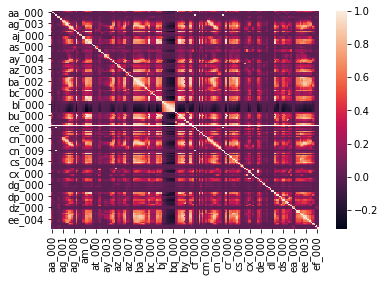

In [14]:
from seaborn import heatmap
import matplotlib.pyplot as plt

heatmap(corr)
plt.show()

### iv. Scatter plots and Box plots for features with highes CV

In [15]:
no_of_features=np.floor(np.sqrt(170))
print ("The number of features to be selected :")
no_of_features

The number of features to be selected :


13.0

In [16]:
cv.sort_values(inplace=True,ascending=False,by="Coeff. of Variation")
features_highest_cv=list((cv.iloc[:13,:]).loc[:,'Features'])
print ("Selected features are : ")
features_highest_cv

Selected features are : 


['cf_000',
 'co_000',
 'ad_000',
 'cs_009',
 'dj_000',
 'df_000',
 'as_000',
 'dh_000',
 'ag_000',
 'au_000',
 'ak_000',
 'az_009',
 'ay_009']

In [17]:
combined_X_selected=combined_X.loc[:,features_highest_cv]
print ("Data with selected features : ")
combined_X_selected

Data with selected features : 


,cf_000,co_000,ad_000,cs_009,dj_000,df_000,as_000,dh_000,ag_000,au_000,ak_000,az_009,ay_009
0,2.000000,220.000000,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,190221.810984,190515.566938,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.000000,2.000000,66.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,202.000000,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2.000000,42.000000,892.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75996,2.000000,0.000000,46.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75997,2.000000,378.000000,1518.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75998,0.000000,0.000000,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
import seaborn as sns

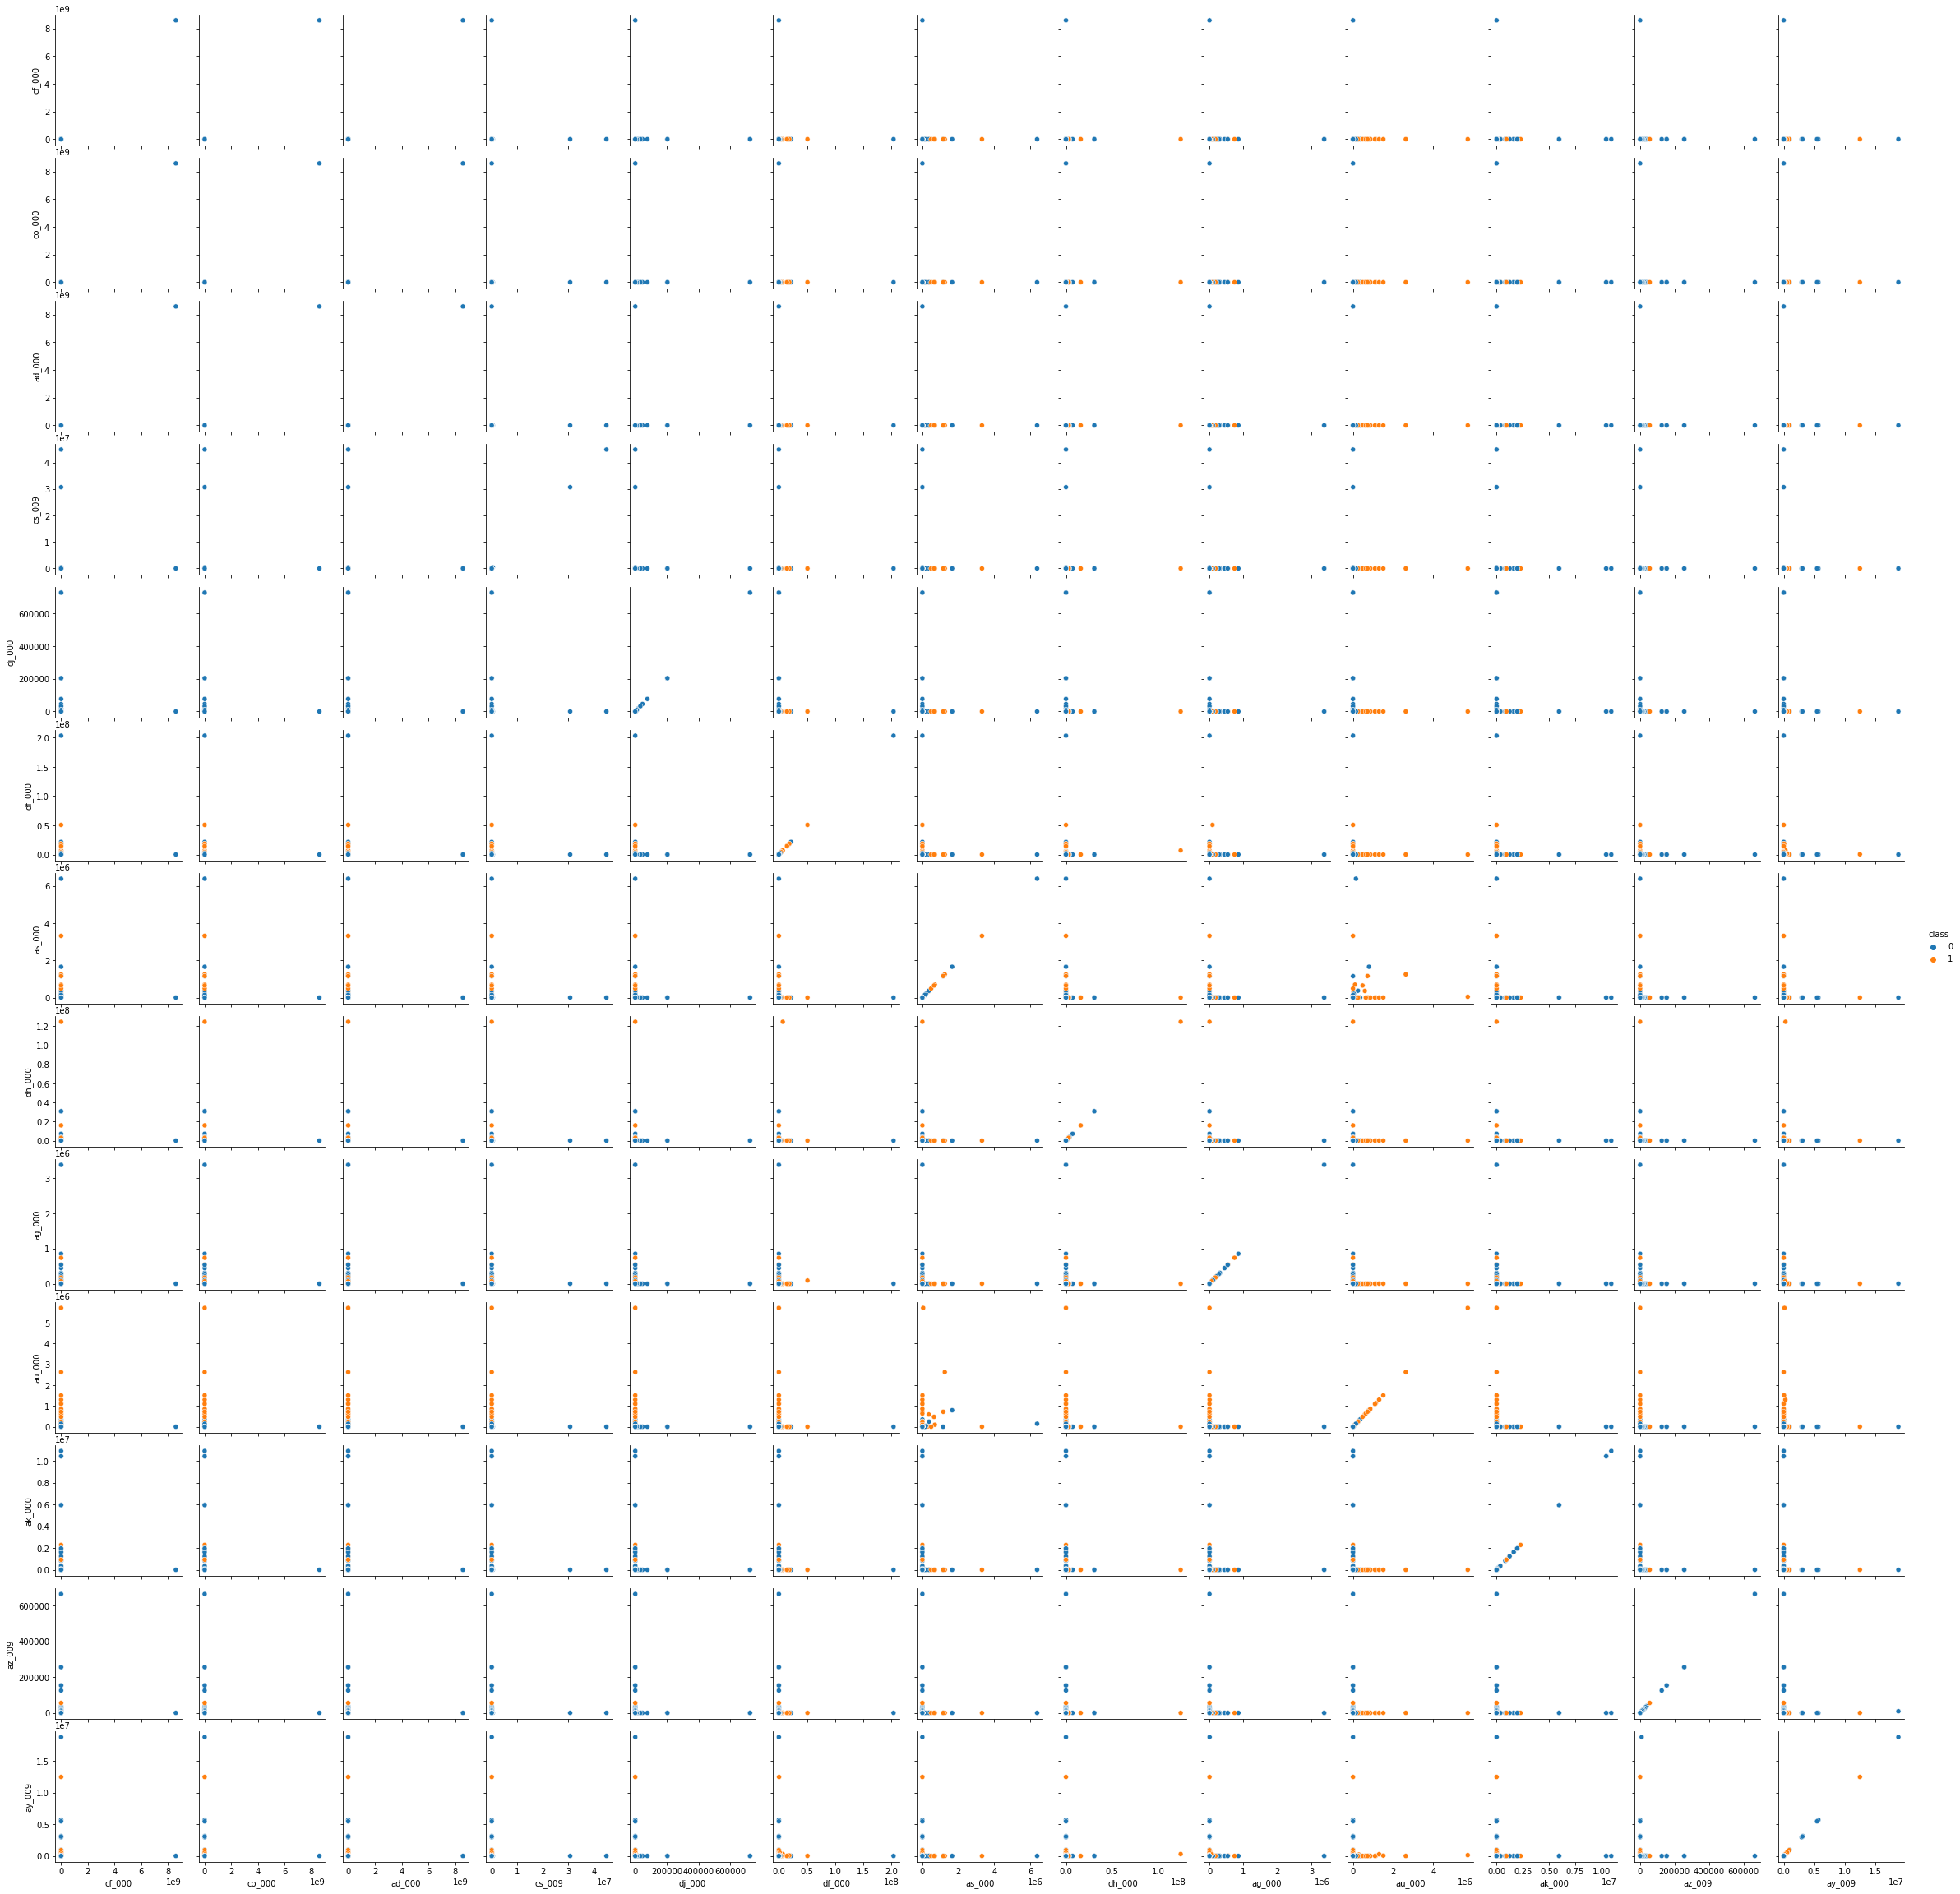

In [19]:
temp=pd.concat([combined_X_selected,combined_y],axis=1)

g=sns.PairGrid(temp,hue='class')
g.map(sns.scatterplot)
g.add_legend()

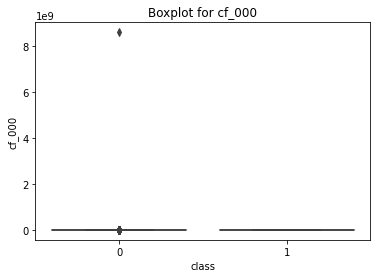

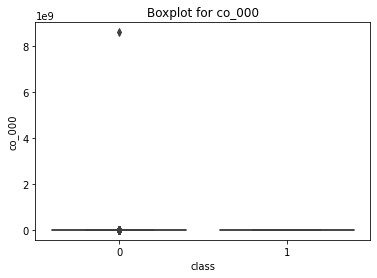

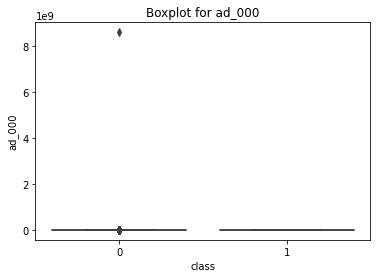

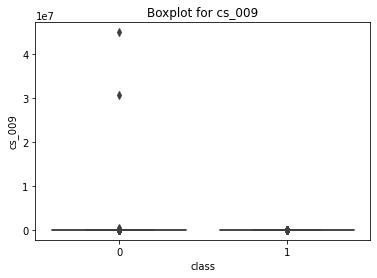

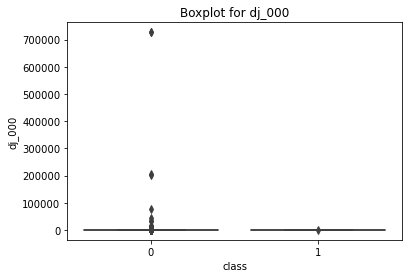

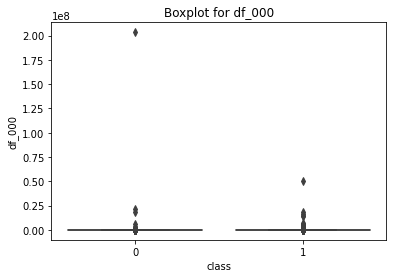

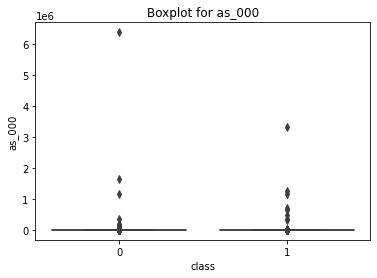

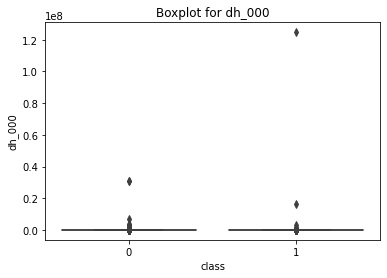

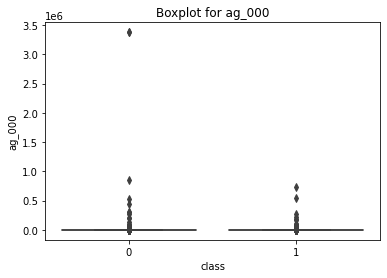

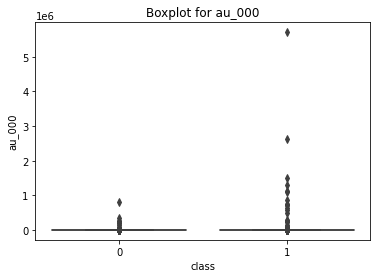

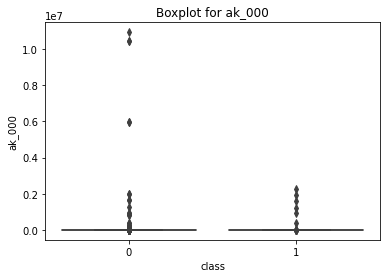

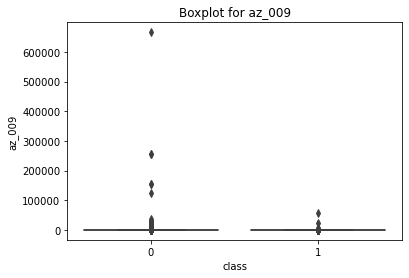

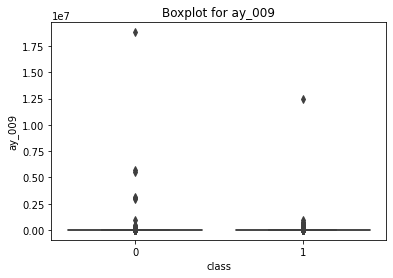

In [20]:
import matplotlib.pyplot as plt

for i in range(int(no_of_features)):
    sns.boxplot(y=combined_X_selected.loc[:,features_highest_cv[i]],x=combined_y).set_title("Boxplot for "+features_highest_cv[i])
    plt.show()

We cannot find the significance of the features with the scatter plot alone, but we can figure out the correlation between the features and the output.' 

### v. Determining if the dataset is imbalanced

In [21]:
from collections import Counter
count=Counter(combined_y)
print ("Count of positive and negative data : \n")
print ("Number of Positive data : ",count[1])
print ("Number of Negative data : ",count[0])

Count of positive and negative data : 

Number of Positive data :  1375
Number of Negative data :  74625


Yes, the dataset is highly imbalanced.

### (c) Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_curve,auc,confusion_matrix

In [23]:
random_forest_classifier=RandomForestClassifier(n_jobs=-1,oob_score=True)
random_forest_classifier.fit(X_train_imputed,y_train)
y_pred_train=random_forest_classifier.predict(X_train_imputed)
y_pred_test=random_forest_classifier.predict(X_test_imputed)
train_error_rf=1-accuracy_score(y_train,y_pred_train)
test_error_rf=1-accuracy_score(y_test,y_pred_test)
oof_error=1-random_forest_classifier.oob_score_
print ("Train error : ",train_error_rf)
print ("Test error : ",test_error_rf)
print ("Out of the Bag error : ",oof_error)

Train error :  0.0
Test error :  0.007437499999999986
Out of the Bag error :  0.006199999999999983


In [24]:
con_matrix_train=confusion_matrix(y_train,y_pred_train)
print ("Confusion Matrix  for train data : \n")
print (con_matrix_train,"\n")
con_matrix_test=confusion_matrix(y_test,y_pred_test)
print ("Confusion Matrix  for test data : \n")
print (con_matrix_test)

Confusion Matrix  for train data : 

[[59000     0]
 [    0  1000]] 

Confusion Matrix  for test data : 

[[15609    16]
 [  103   272]]



ROC Curve for train data : 



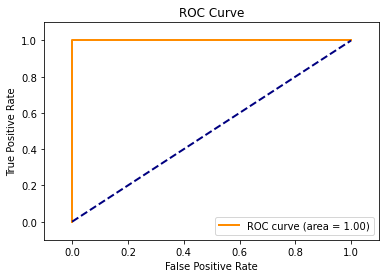


AUC :  1.0


In [25]:
fpr,tpr,threshold=roc_curve(y_train,y_pred_train)
area_under_curve=auc(fpr,tpr)
print ("\nROC Curve for train data : \n")
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print ("\nAUC : ",area_under_curve)


ROC Curve for train data : 



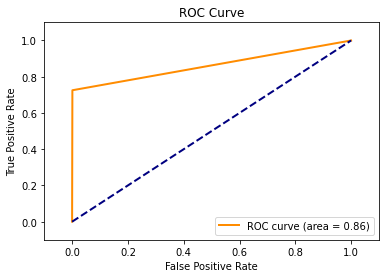


AUC :  0.8621546666666667


In [26]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_test)
area_under_curve=auc(fpr,tpr)
print ("\nROC Curve for train data : \n")
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print ("\nAUC : ",area_under_curve)

The Out of Bag error is smaller compared to test error.

### (d) Random Forests Classifier with compensation for class imbalance 

### Using SMOTE

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
smote=SMOTE()
X_sm,y_sm=smote.fit_resample(X_train_imputed,y_train)

random_forest_classifier=RandomForestClassifier(n_jobs=-1,oob_score=True)
random_forest_classifier.fit(X_sm,y_sm)

y_pred_train=random_forest_classifier.predict(X_sm)
y_pred_test=random_forest_classifier.predict(X_test_imputed)
train_error_rf_sm=1-accuracy_score(y_sm,y_pred_train)
test_error_rf_sm=1-accuracy_score(y_test,y_pred_test)
oof_error_sm=1-random_forest_classifier.oob_score_
print ("Train error : ",train_error_rf_sm)
print ("Test error : ",test_error_rf_sm)
print ("Out of the Bag error : ",oof_error_sm)

Train error :  0.0
Test error :  0.009062499999999973
Out of the Bag error :  0.0030508474576270705


In [29]:
con_matrix_train=confusion_matrix(y_sm,y_pred_train)
print ("Confusion Matrix  for train data : \n")
print (con_matrix_train,"\n")
con_matrix_test=confusion_matrix(y_test,y_pred_test)
print ("Confusion Matrix  for test data : \n")
print (con_matrix_test)

Confusion Matrix  for train data : 

[[59000     0]
 [    0 59000]] 

Confusion Matrix  for test data : 

[[15540    85]
 [   60   315]]



ROC Curve for train data : 



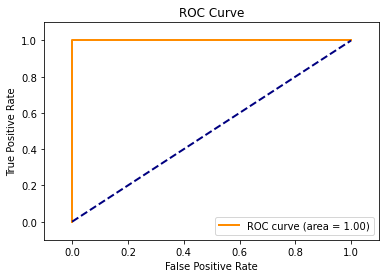


AUC :  1.0


In [30]:
fpr,tpr,threshold=roc_curve(y_sm,y_pred_train)
area_under_curve=auc(fpr,tpr)
print ("\nROC Curve for train data : \n")
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print ("\nAUC : ",area_under_curve)


ROC Curve for train data : 



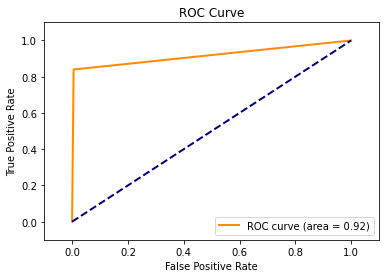


AUC :  0.9172799999999999


In [31]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_test)
area_under_curve=auc(fpr,tpr)
print ("\nROC Curve for train data : \n")
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print ("\nAUC : ",area_under_curve)

In [50]:
print ("Comparing 2c and 2d using SMOTE : \n")
df=pd.DataFrame({"imbalanced dataset":[train_error_rf,test_error_rf,oof_error],
                 'balanced dataset':[train_error_rf_sm,test_error_rf_sm,oof_error_sm]},
                index=['Train Error','Test Error',"Out of Bag Error"])
df

Comparing 2c and 2d using SMOTE : 



,imbalanced dataset,balanced dataset
Train Error,0.000000,0.000000
Test Error,0.007437,0.009062
Out of Bag Error,0.007733,0.003051


The Out of Bag error is better for balanced dataset and the test error is better for the imabalanced dataset 

### using attribute of Random Forest Classifier 'class_weight'

In [48]:
random_forest_classifier=RandomForestClassifier(n_jobs=-1,oob_score=True,class_weight='balanced')
random_forest_classifier.fit(X_train_imputed,y_train)
y_pred_train=random_forest_classifier.predict(X_train_imputed)
y_pred_test=random_forest_classifier.predict(X_test_imputed)
train_error_rf_=1-accuracy_score(y_train,y_pred_train)
test_error_rf_=1-accuracy_score(y_test,y_pred_test)
oof_error_=1-random_forest_classifier.oob_score_
print ("Train error : ",train_error_rf_)
print ("Test error : ",test_error_rf_)
print ("Out of the Bag error : ",oof_error_)

Train error :  1.666666666666483e-05
Test error :  0.011125000000000052
Out of the Bag error :  0.007816666666666694


In [33]:
con_matrix_train=confusion_matrix(y_train,y_pred_train)
print ("Confusion Matrix  for train data : \n")
print (con_matrix_train,"\n")
con_matrix_test=confusion_matrix(y_test,y_pred_test)
print ("Confusion Matrix  for test data : \n")
print (con_matrix_test)

Confusion Matrix  for train data : 

[[59000     0]
 [    0  1000]] 

Confusion Matrix  for test data : 

[[15610    15]
 [  161   214]]



ROC Curve for train data : 



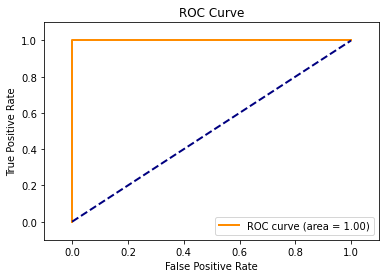


AUC :  1.0


In [34]:
fpr,tpr,threshold=roc_curve(y_train,y_pred_train)
area_under_curve=auc(fpr,tpr)
print ("\nROC Curve for train data : \n")
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print ("\nAUC : ",area_under_curve)


ROC Curve for train data : 



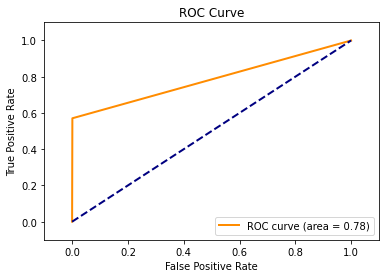


AUC :  0.7848533333333334


In [35]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_test)
area_under_curve=auc(fpr,tpr)
print ("\nROC Curve for train data : \n")
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print ("\nAUC : ",area_under_curve)

In [51]:
print ("Comparing 2c and 2d using balanced weights : \n")
df=pd.DataFrame({"imbalanced dataset":[train_error_rf,test_error_rf,oof_error],
                 'balanced dataset':[train_error_rf_,test_error_rf_,oof_error_]},
                index=['Train Error','Test Error',"Out of Bag Error"])
df

Comparing 2c and 2d using balanced weights : 



,imbalanced dataset,balanced dataset
Train Error,0.000000,0.000017
Test Error,0.007437,0.011125
Out of Bag Error,0.007733,0.007817


The Out of Bag error is better for balanced dataset and the test error is better for the imabalanced dataset 

### Changing Class labels for part e and f

In [36]:
import copy
y_train_=copy.deepcopy(y_train)
y_test_=copy.deepcopy(y_test)
(y_train_).replace({0:'neg',1:'pos'},inplace=True)
y_train_

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
59995    neg
59996    neg
59997    neg
59998    neg
59999    neg
Name: class, Length: 60000, dtype: object

In [37]:
(y_test_).replace({0:'neg',1:'pos'},inplace=True)
y_test_

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
15995    neg
15996    neg
15997    neg
15998    neg
15999    neg
Name: class, Length: 16000, dtype: object

In [38]:
dataset_train_imputed_=pd.concat([X_train_imputed,y_train_],axis=1)
dataset_train_imputed_

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,neg
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,neg
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0,neg
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,neg
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0,neg
59996,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0,neg
59997,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0,neg
59998,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0,neg


In [39]:
dataset_test_imputed_=pd.concat([X_test_imputed,y_test_],axis=1)
dataset_test_imputed_

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,60.0,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0,neg
1,82.0,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0,neg
2,66002.0,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0,neg
3,59816.0,0.713189,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0,neg
4,1814.0,0.713189,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852.0,0.713189,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0,neg
15996,18.0,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0,neg
15997,79636.0,0.713189,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0,neg
15998,110.0,0.713189,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0,neg


In [40]:
dataset_train_imputed_.to_csv("../data/aps_failure_training_set_imputed.csv",index=False)

In [41]:
dataset_test_imputed_.to_csv("../data/aps_failure_testing_set_imputed.csv",index=False)